In [7]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt

# Read data from csv and print the first few rows to instpect the set.
medals = pd.read_csv("../datasets/medals_by_country_2016.csv", index_col=0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


# Quantitative comparisons: bar-charts

### Bar Chart

/var/folders/py/0t0zfhzj2dz91fv8lz04vw6h0000gn/T/ipykernel_97923/2016095535.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


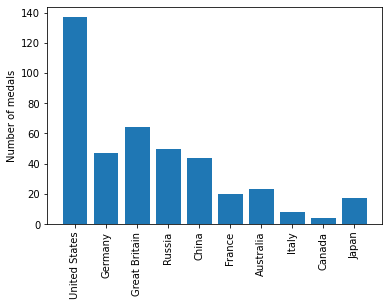

In [12]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### Stacked bar chart

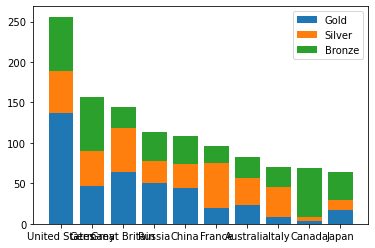

In [13]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label="Bronze")


# Display the legend
ax.legend()

plt.show()

# Quantitative comparisons: histograms

In [18]:
# import dataset
mens_rowing = pd.read_csv("../datasets/mens-rowing.csv")
mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
2,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
3,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
4,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


In [19]:
mens_gymnastics = pd.read_csv("../datasets/mens_gymnastics.csv")
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
1,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
2,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
3,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
4,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


### Creating histograms

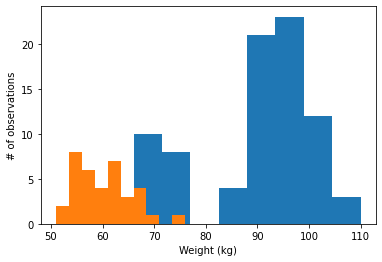

In [20]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### "Step" histogram

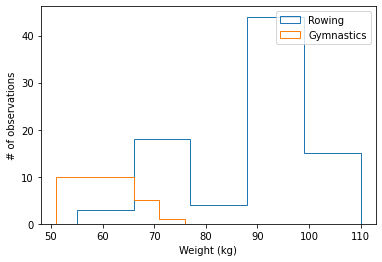

In [21]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype="step", bins=5, label="Rowing")

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype="step", bins=5, label="Gymnastics")

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

# Statistical plotting

### Adding error-bars to a bar chart

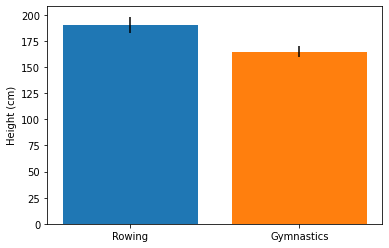

In [22]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot

In [46]:
# Import data
seattle_weather = pd.read_csv("../datasets/seattle_weather.csv")
# rename the DATE column to MONTH
seattle_weather.rename(columns={"DATE":"MONTH"}, inplace=True)
# Group the data by MONTH getting the max and ensuring that MONTH stays as a column instead of becoming an index.
seattle_weather = seattle_weather.groupby(['MONTH']).max().reset_index()
# get the top few rows of the table.
seattle_weather.head()

,MONTH,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,USW00094290,"WAUNA 3 W, WA US",40.0,6.0,1.0,0.0,0.0,0.0,0.0,...,310.0,310.0,37.5,224.0,467.0,781.0,961.0,1000.0,1000.0,3.1
1,2,USW00094290,"WAUNA 3 W, WA US",43.0,8.0,1.0,0.0,0.0,0.0,0.0,...,280.0,280.0,37.4,196.0,376.0,667.0,916.0,997.0,1000.0,3.3
2,3,USW00094290,"WAUNA 3 W, WA US",107.0,29.0,4.0,1.0,-7777.0,0.0,0.0,...,310.0,310.0,40.1,27.0,68.0,277.0,750.0,994.0,1000.0,2.4
3,4,USW00094290,"WAUNA 3 W, WA US",207.0,86.0,25.0,14.0,5.0,0.0,0.0,...,300.0,300.0,43.9,0.0,9.0,94.0,396.0,880.0,1000.0,2.7
4,5,USW00094290,"WAUNA 3 W, WA US",381.0,230.0,104.0,69.0,34.0,1.0,-7777.0,...,310.0,310.0,48.2,0.0,0.0,22.0,84.0,370.0,875.0,2.5


In [47]:
# Import data
austin_weather = pd.read_csv("../datasets/austin_weather.csv")
# rename the DATE column to MONTH
austin_weather.rename(columns={"DATE":"MONTH"}, inplace=True)
# Group the data by MONTH summing and ensuring that MONTH stays as a column instead of becoming an index.
austin_weather = austin_weather.groupby(['MONTH']).sum().reset_index()
# get the top few rows of the table.
austin_weather.head()

,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,190,103,50,35,18,1,-7777,5,25.8,...,302,310,36.3,298,570,839,967,997,1000,2.9
1,2,228,132,68,49,29,3,1,11,25.3,...,264,280,39.4,103,327,614,867,973,999,3.2
2,3,446,306,185,146,98,13,6,42,25.2,...,270,308,46.6,10,73,242,494,761,928,3.6
3,4,668,519,373,318,240,53,32,130,25.1,...,193,287,54.7,0,0,0,48,189,453,4.1
4,5,936,781,626,564,471,181,134,319,23.0,...,89,250,63.7,0,0,0,0,0,0,2.5


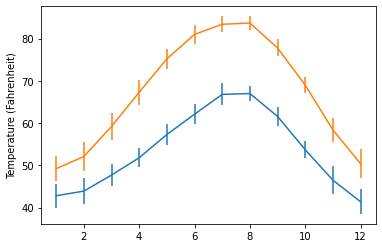

In [48]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])
 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Creating boxplots

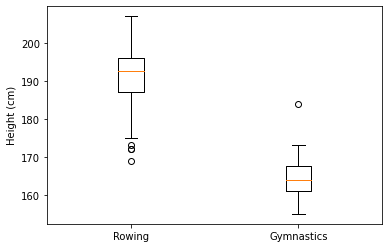

In [49]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

# Quantitative comparisons: scatter plots

In [50]:
# Import dataset
climate_change = pd.read_csv("../datasets/climate_change.csv")
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


### Simple scatter plot

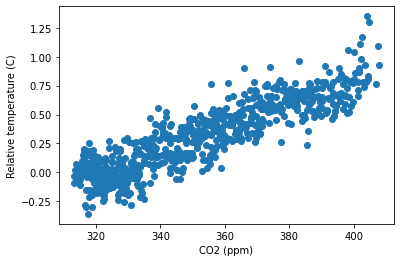

In [51]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

### Encoding time by color

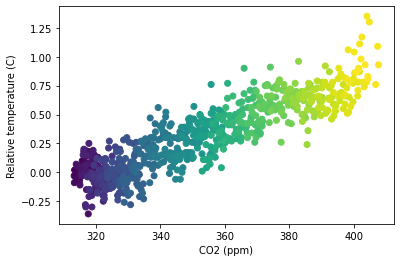

In [53]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()